# Code for Figure 3 part (c) and associated statistics reported in the text

Developed by Siobhan Powell, 2021. 

In [1]:
import os
os.chdir('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [3]:
maxpen_results1GW = pd.read_csv('Results/max_penetration_levels_1h_2035_1GWstorage_20220408.csv', index_col=0)
maxpen_results5GW = pd.read_csv('Results/max_penetration_levels_1h_2035_5GWstorage_20220408.csv', index_col=0)
maxpen_results10GW = pd.read_csv('Results/max_penetration_levels_1h_2035_10GWstorage_20220408.csv', index_col=0)

In [4]:
maxpen_results1GW_bau = pd.read_csv('Results/max_penetration_levels_1h_bau_2035_1GWstorage_20220408.csv', index_col=0)
maxpen_results5GW_bau = pd.read_csv('Results/max_penetration_levels_1h_bau_2035_5GWstorage_20220408.csv', index_col=0)
maxpen_results10GW_bau = pd.read_csv('Results/max_penetration_levels_1h_bau_2035_10GWstorage_20220408.csv', index_col=0)

In [5]:
maxpen_results5GW_bau

,fuel1_solar3.5_wind3_BusinessAsUsual_WPcontrol_minpeak
TimersMixed,0.56


In [6]:
maxpen_results1GW

,fuel1_solar3.5_wind3_UniversalHome_noWPcontrol,fuel1_solar3.5_wind3_UniversalHome_WPcontrol_avgem,fuel1_solar3.5_wind3_UniversalHome_WPcontrol_minpeak,fuel1_solar3.5_wind3_HighHome_noWPcontrol,fuel1_solar3.5_wind3_HighHome_WPcontrol_avgem,fuel1_solar3.5_wind3_HighHome_WPcontrol_minpeak,fuel1_solar3.5_wind3_LowHome_HighWork_noWPcontrol,fuel1_solar3.5_wind3_LowHome_HighWork_WPcontrol_avgem,fuel1_solar3.5_wind3_LowHome_HighWork_WPcontrol_minpeak,fuel1_solar3.5_wind3_LowHome_LowWork_noWPcontrol,fuel1_solar3.5_wind3_LowHome_LowWork_WPcontrol_avgem,fuel1_solar3.5_wind3_LowHome_LowWork_WPcontrol_minpeak
TimersRandom,0.07,NaN,NaN,0.08,NaN,NaN,0.09,NaN,NaN,0.09,NaN,NaN
Timers9pm,0.07,NaN,NaN,0.08,NaN,NaN,0.09,NaN,NaN,0.09,NaN,NaN
Timers12am,0.07,NaN,NaN,0.08,NaN,NaN,0.09,NaN,NaN,0.09,NaN,NaN
TimersNone,0.05,0.05,0.05,0.07,0.07,0.07,0.08,0.08,0.08,0.08,0.08,0.08


In [24]:
maxpen_results10GW.loc['Timers9pm', 'fuel1_solar3.5_wind3_UniversalHome_noWPcontrol']

0.5900000000000001

In [25]:
maxpen_results10GW.loc['TimersNone', 'fuel1_solar3.5_wind3_UniversalHome_noWPcontrol']

0.67

In [26]:
maxpen_results10GW['fuel1_solar3.5_wind3_UniversalHome_noWPcontrol']

TimersRandom    0.83
Timers9pm       0.59
Timers12am      0.86
TimersNone      0.67
Name: fuel1_solar3.5_wind3_UniversalHome_noWPcontrol, dtype: float64

In [7]:
def fig3c(maxpen_results, cols, cols1, cols2, maxpen_result_bau, legend=True, save_str=None):
    fig, axes = plt.subplots(1, 1, figsize=(10, 3.5))
    titles=['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work']
    colors = ['#d7301f', '#fc8d59', '#91cf60', '#737373', '#9ebcda', '#88419d']
    control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Random SFH Timers', 'Uncontrolled', 'Min(Peak) Work Control', 'Min(Avg Em) Work Control']
    hatches = ['//', '/', '///', '', '.', 'o']

    axes.set_xticks([0, 1, 1.75, 2.5, 3.5])
    axes.set_xticklabels(labels=['Universal Home', 'High Home', 'BAU', 'Low Home High Work', 'Low Home Low Work'], fontsize=12)
    axes.set_ylabel('Change in Weekday Peak [GW]', fontsize=12)
    axes.set_xlabel('Access Scenario', fontsize=14)

    values = maxpen_results.loc['Timers9pm', cols]
    axes.bar(np.array([0, 1, 2.5, 3.5])-0.2, values, 0.1, color=colors[0], label=control_labels[0], edgecolor='k', hatch=hatches[0])
    values = maxpen_results.loc['Timers12am', cols]
    axes.bar(np.array([0, 1, 2.5, 3.5])-0.1, values, 0.1, color=colors[1], label=control_labels[1], edgecolor='k', hatch=hatches[1])
    values = maxpen_results.loc['TimersRandom', cols]
    axes.bar(np.array([0, 1, 2.5, 3.5]), values, 0.1, color=colors[2], label=control_labels[2], edgecolor='k', hatch=hatches[2])
    values = maxpen_results.loc['TimersNone', cols1]
    axes.bar(np.array([0, 1, 2.5, 3.5])+0.2, values, 0.1, color=colors[4], label=control_labels[4], edgecolor='k', hatch=hatches[4])
    values = maxpen_results.loc['TimersNone', cols2]
    axes.bar(np.array([0, 1, 2.5, 3.5])+0.3, values, 0.1, color=colors[5], label=control_labels[5], edgecolor='k', hatch=hatches[5])
    values = maxpen_results.loc['TimersNone', cols]
    axes.bar(np.array([0, 1, 2.5, 3.5])+0.1, values, 0.1, color=colors[3], edgecolor='k', label=control_labels[3], hatch=hatches[3])
    axes.bar([1.75], maxpen_result_bau, 0.1, color='#ffffbf', edgecolor='k', hatch='x')
        
    edgecolors=[None, None, 'k', None, None]
    legend_elements = [Patch(facecolor=colors[i], edgecolor='k', hatch=hatches[i],
                                 label=control_labels[i]) for i in range(len(control_labels))]
    legend_elements.append(Patch(facecolor='#ffffbf', edgecolor='k', label='Business As Usual, Timers + Work Control', hatch='x'))
    if legend:
        axes.legend(handles=legend_elements, loc='upper left', fontsize=10, ncol=2)
        
    
    axes.set_ylabel('Max Level of EVs Supported', fontsize=12)
    axes.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    axes.set_yticklabels(['0', '20%', '40%', '60%', '80%','100%'], fontsize=12)
    axes.set_xlabel('Access Scenario', fontsize=14)
#     axes.set_yticks(np.arange(0, 35, 5))
#     axes.set_yticklabels(np.arange(0, 35, 5), fontsize=14)
    axes.set_axisbelow(True)        
    axes.grid(axis='y')

    plt.tight_layout()
    if save_str is not None:
        plt.savefig('MainPlotting/Plots/'+save_str+'.pdf', bbox_inches='tight')
    plt.show()

In [18]:
maxpen_results1GW_bau.loc['TimersMixed'].values[0]

0.08

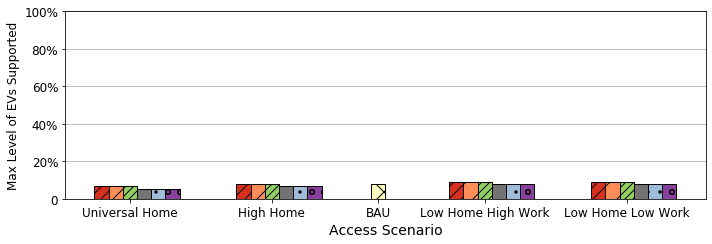

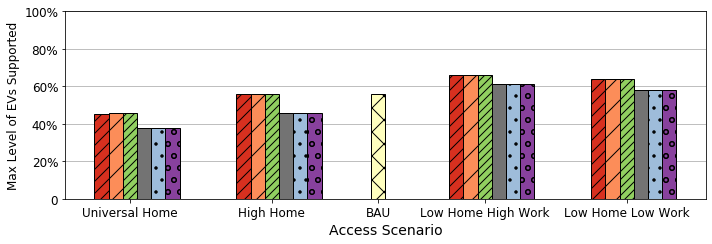

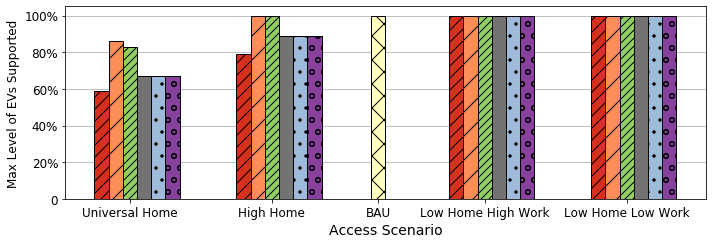

In [21]:
solar = 3.5
wind = 3
cols = ['fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scenario+'_noWPcontrol' for scenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']]
cols1 = ['fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scenario+'_WPcontrol_minpeak' for scenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']]
cols2 = ['fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scenario+'_WPcontrol_avgem' for scenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']]
fig3c(maxpen_results1GW, cols, cols1, cols2, maxpen_results1GW_bau.loc['TimersMixed'].values[0], legend=False, save_str='fig3c_2035_1GW')
fig3c(maxpen_results5GW, cols, cols1, cols2, maxpen_results5GW_bau.loc['TimersMixed'].values[0], legend=False, save_str='fig3c_2035_5GW')
fig3c(maxpen_results10GW, cols, cols1, cols2, maxpen_results10GW_bau.loc['TimersMixed'].values[0], legend=False, save_str='fig3c_2035_10GW')


#'fig3c_v2')
# fig3c(maxpen_results1, cols, cols1, cols2, maxpen_results8.loc['TimersMixed', 'fuel1_solar2.5_wind2.5_BusinessAsUsual_WPcontrol_minpeak'], legend=True, save_str='fig3c_v2_legend')


# 2030

In [3]:
maxpen_results1 = pd.read_csv('Results/max_penetration_levels_1h_20220330.csv', index_col=0)
maxpen_results8 = pd.read_csv('Results/max_penetration_levels_1h_bau_20220330.csv', index_col=0)

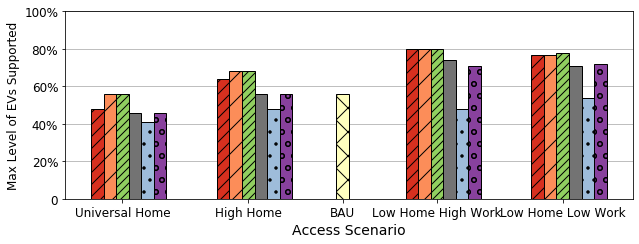

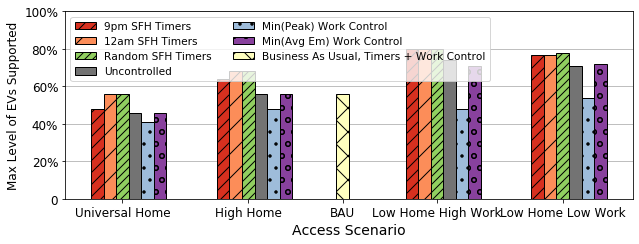

In [14]:
solar = 2.5
wind = 2.5 
cols = ['fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scenario+'_noWPcontrol' for scenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']]
cols1 = ['fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scenario+'_WPcontrol_minpeak' for scenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']]
cols2 = ['fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scenario+'_WPcontrol_avgem' for scenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']]
fig3c(maxpen_results1, cols, cols1, cols2, maxpen_results8.loc['TimersMixed', 'fuel1_solar2.5_wind2.5_BusinessAsUsual_WPcontrol_minpeak'], legend=False, save_str='fig3c_v2')
fig3c(maxpen_results1, cols, cols1, cols2, maxpen_results8.loc['TimersMixed', 'fuel1_solar2.5_wind2.5_BusinessAsUsual_WPcontrol_minpeak'], legend=True, save_str='fig3c_v2_legend')
